In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import yaml
from src.feature_extraction import coarsen_density, scale_density, scale_population_curves, split_data
from src.scree_and_elbow_plotting import pca_scree_plot, kmeans_elbow_plot

# **Dataset 1**

In [2]:
max_pca_dim = 10
min_pca_dim = 1
max_clusters = 10
min_clusters = 2

## Density

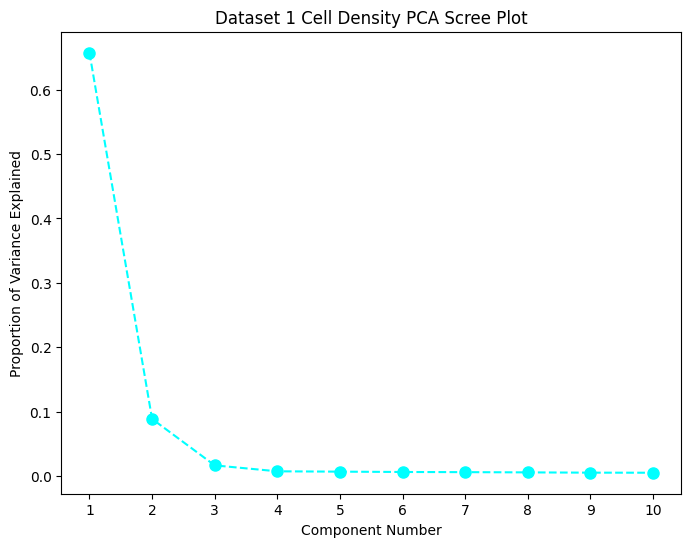

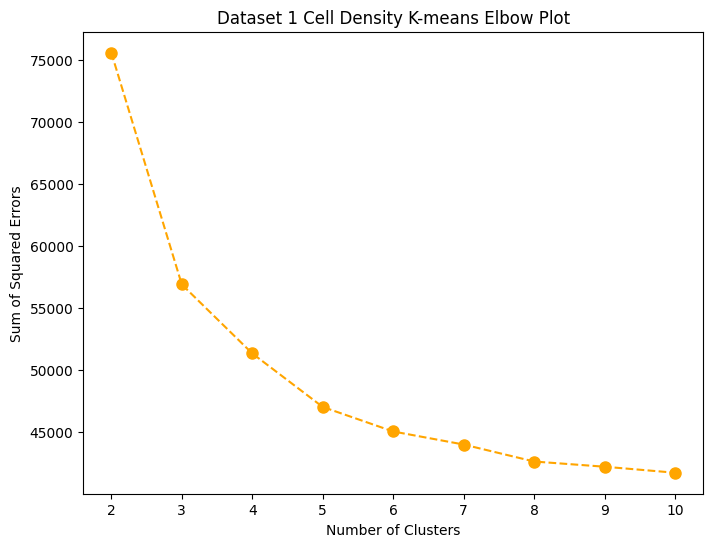

In [3]:
old_density = np.load("../data/dataset1/density.npy", allow_pickle = True)
coarse_resolution = (25)**2
density = np.empty((121*10, coarse_resolution))

# Coarsen density to 8x8 bins
for i, v in enumerate(old_density):
    v = v.reshape(200,200)
    coarse_v = coarsen_density(v, I = 200, h = 1000/(199.0), bin_size = 8)
    density[i] = coarse_v

# Split density into training/testing set and standardize data
density_train, _ = split_data(density, itr_cutoff = 5)
density_train = scale_density(density_train).reshape((605,coarse_resolution))

pca = PCA(n_components = 3, random_state = 0)
pca.fit_transform(density_train)

scree_fig, scree_ax = pca_scree_plot(density_train,
                                     title = "Dataset 1 Cell Density PCA Scree Plot",
                                     max_dim = max_pca_dim,
                                     min_dim = min_pca_dim,
                                     figsize = (8,6))


elbow_fig, elbow_ax = kmeans_elbow_plot(density_train,
                                        title = "Dataset 1 Cell Density K-means Elbow Plot",
                                        max_clusters = max_clusters,
                                        min_clusters = min_clusters,
                                        figsize = (8,6))

## Cell Counts

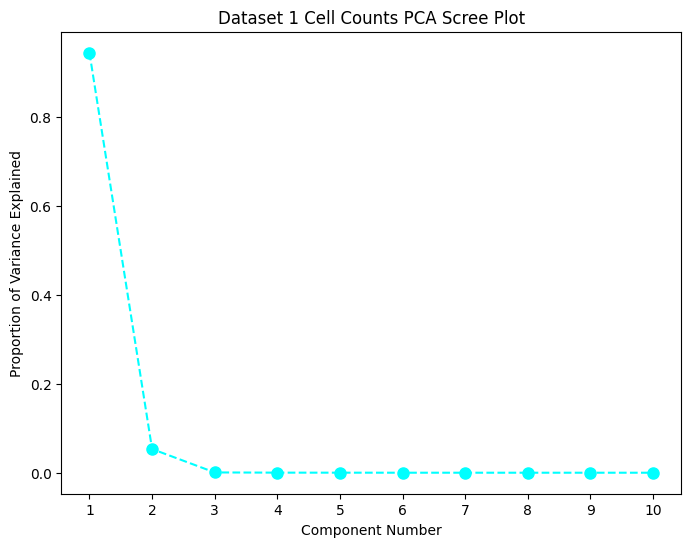

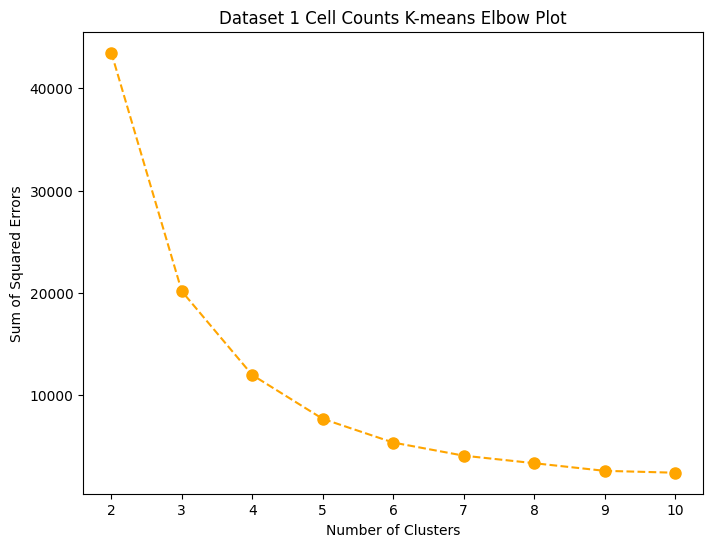

In [4]:
cell_counts = np.load("../data/dataset1/cell_counts.npy", allow_pickle = True)
cell_counts = cell_counts.reshape(1210, 241*4)

# Split density into training/testing set and standardize data
cell_counts_train, _ = split_data(cell_counts, itr_cutoff = 5)
cell_counts_train = scale_density(cell_counts_train).reshape((605,241*4))

pca = PCA(n_components = 3, random_state = 0)
pca.fit_transform(cell_counts_train)

scree_fig, scree_ax = pca_scree_plot(cell_counts_train,
                                     title = "Dataset 1 Cell Counts PCA Scree Plot",
                                     max_dim = max_pca_dim,
                                     min_dim = min_pca_dim,
                                     figsize = (8,6))


elbow_fig, elbow_ax = kmeans_elbow_plot(cell_counts_train,
                                        title = "Dataset 1 Cell Counts K-means Elbow Plot",
                                        max_clusters = max_clusters,
                                        min_clusters = min_clusters,
                                        figsize = (8,6))

# **Dataset 2**

# Density

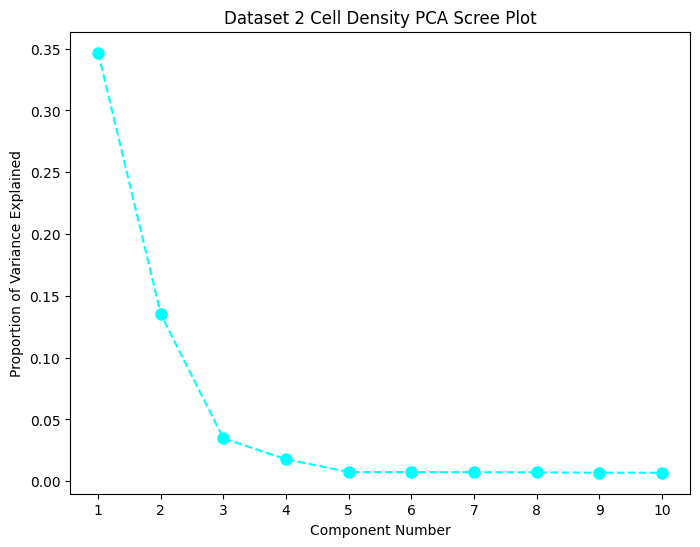

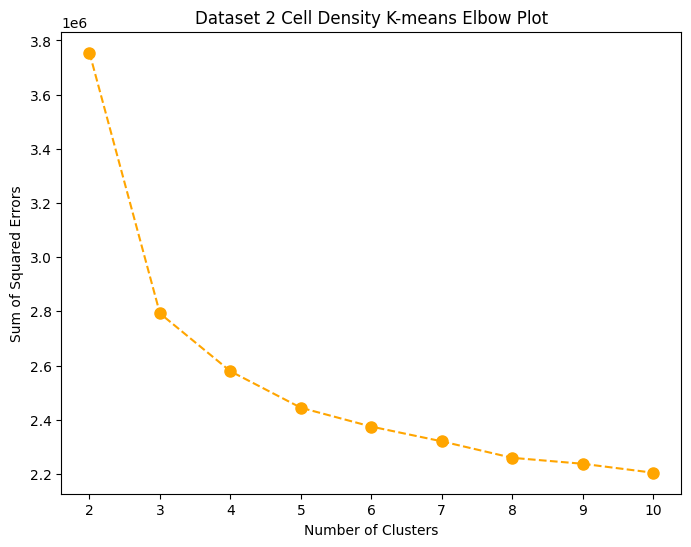

In [5]:
density = np.load("../data/dataset2/8x8_density.npy", allow_pickle = True)
density = density.reshape(54450,25,25)

# Split density into training/testing set and standardize data
density_train, _ = split_data(density, itr_cutoff = 5)
density_train = scale_density(density_train).reshape((27225,25*25))

pca = PCA(n_components = 3, random_state = 0)
pca.fit_transform(density_train)

scree_fig, scree_ax = pca_scree_plot(density_train,
                                     title = "Dataset 2 Cell Density PCA Scree Plot",
                                     max_dim = max_pca_dim,
                                     min_dim = min_pca_dim,
                                     figsize = (8,6))


elbow_fig, elbow_ax = kmeans_elbow_plot(density_train,
                                        title = "Dataset 2 Cell Density K-means Elbow Plot",
                                        max_clusters = max_clusters,
                                        min_clusters = min_clusters,
                                        figsize = (8,6))

## Cell Counts

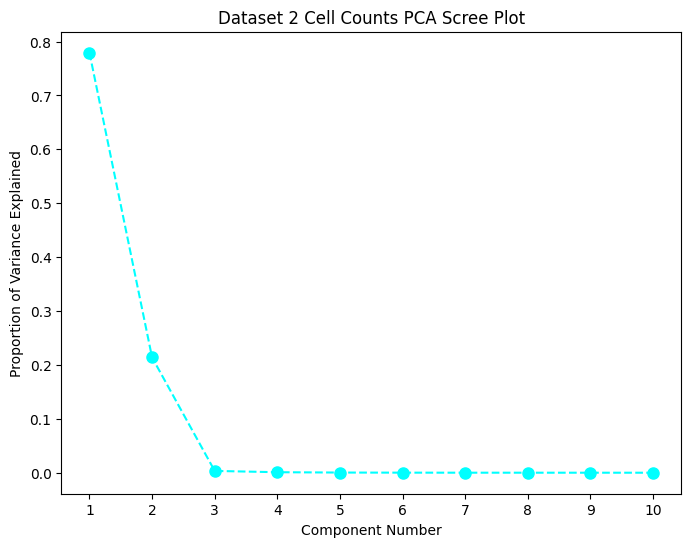

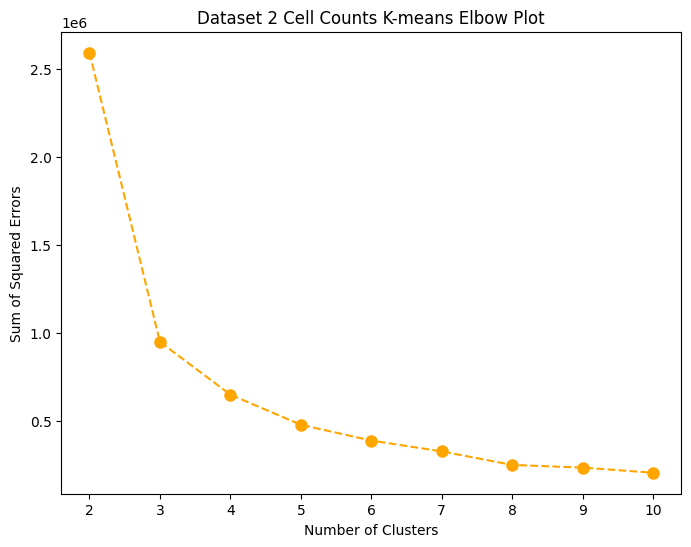

In [6]:
cell_counts = np.load("../data/dataset2/cell_counts.npy", allow_pickle = True)
cell_counts = cell_counts.reshape(54450, 241*4)

# Split density into training/testing set and standardize data
cell_counts_train, _ = split_data(cell_counts, itr_cutoff = 5)
cell_counts_train = scale_density(cell_counts_train).reshape((27225,241*4))

pca = PCA(n_components = 3, random_state = 0)
pca.fit_transform(cell_counts_train)

scree_fig, scree_ax = pca_scree_plot(cell_counts_train,
                                     title = "Dataset 2 Cell Counts PCA Scree Plot",
                                     max_dim = max_pca_dim,
                                     min_dim = min_pca_dim,
                                     figsize = (8,6))


elbow_fig, elbow_ax = kmeans_elbow_plot(cell_counts_train,
                                        title = "Dataset 2 Cell Counts K-means Elbow Plot",
                                        max_clusters = max_clusters,
                                        min_clusters = min_clusters,
                                        figsize = (8,6))